In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
yfinance = pd.read_csv("data/disney_yfinance.csv")
dis_submissions = pd.read_csv("data/disney_all_sub.csv")

D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,4,5,6,8,9,10,11,12,16,18,19,20,21,22,24,25,26,27,28,29,30,31,35,37,39,43,44,49,53,56,58,59,60,65,66,67,68,69,74,75,76,77,78,79,80,81,83,85,87,88,89,90,91,92,93,94,95) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
yfinance.head()

Date       Open       High        Low      Close  Adj Close    Volume
0  1/3/2000  28.855125  29.533344  28.361876  29.471687  23.115255   8402230
1  1/4/2000  29.594999  31.444689  29.594999  31.198063  24.469284  16051191
2  1/5/2000  31.198063  32.677814  31.198063  32.492844  25.484806  19823822
3  1/6/2000  32.492844  32.677814  31.198063  31.198063  24.469284   7903193
4  1/7/2000  31.198063  31.691313  30.396530  30.704813  24.082420   6773543

In [4]:
dis_submissions.head()

all_awardings allow_live_comments             author author_flair_css_class  \
0            []               False  The-Remix-God-ALT                      0   
1            []               False      Supershlee777                      0   
2            []               False     theagileartist                      0   
3            []               False         PeachyLeee                      0   
4            []               False   artsychimichanga                      0   

  author_flair_richtext author_flair_text author_flair_type author_fullname  \
0                    []                 0              text     t2_8b0yo2pg   
1                    []                 0              text     t2_7zle95u7   
2                    []                 0              text     t2_7ohoma2p   
3                    []                 0              text     t2_684v8y3b   
4                    []                 0              text     t2_50qxngv9   

  author_patreon_flair author_premium  ... brand_safe rte_mode author_id  \
0                False          False  ...          0        0         0   
1                False          False  ...          0        0         0   
2                False          False  ...          0        0         0   
3                False          False  ...          0        0         0   
4                False          False  ...          0        0         0   

   previous_visits suggested_sort author_created_utc approved_at_utc  \
0                0              0                0.0               0   
1                0              0                0.0               0   
2                0              0                0.0               0   
3                0              0                0.0               0   
4                0              0                0.0               0   

  banned_at_utc view_count creation_date  
0             0          0    01-10-2021  
1             0          0    01-10-2021  
2             0          0    01-10-2021  
3             0          0    01-10-2021  
4             0          0    01-10-2021  

[5 rows x 101 columns]

In [5]:
dis_submissions.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_patreon_flair',
       'author_premium',
       ...
       'brand_safe', 'rte_mode', 'author_id', 'previous_visits',
       'suggested_sort', 'author_created_utc', 'approved_at_utc',
       'banned_at_utc', 'view_count', 'creation_date'],
      dtype='object', length=101)

In [6]:
drop_columns = [
    'all_awardings', 'author_flair_css_class', 'author_flair_richtext', 'author_patreon_flair', 'author_premium',
    'can_mod_post', 'contest_mode', 'gildings', 'is_crosspostable', 'is_meta', 'is_original_content', 'is_reddit_media_domain', 
    'is_robot_indexable', 'link_flair_background_color', 'link_flair_text_color', 'locked', 'media_only', 'no_follow',
    'parent_whitelist_status', 'permalink', 'pwls', 'removed_by_category', 'send_replies', 'spoiler',
    'url', 'whitelist_status', 'wls', 'link_flair_css_class', 'link_flair_template_id', 'post_hint', 'preview',
    'thumbnail_height', 'thumbnail_width', 'url_overridden_by_dest', 'author_flair_background_color', 'author_flair_template_id',
    'author_flair_text_color', 'is_gallery', 'edited', 'banned_by', 'author_is_blocked', 'author_flair_text', 'author_flair_type',
    'secure_media', 'secure_media_embed', 'author_cakeday'
]

for _ in drop_columns:
    del dis_submissions[_]
        
dis_submissions.columns

Index(['allow_live_comments', 'author', 'author_fullname', 'awarders',
       'created_utc', 'domain', 'full_link', 'id', 'is_self', 'is_video',
       'link_flair_richtext', 'link_flair_type', 'num_comments',
       'num_crossposts', 'over_18', 'pinned', 'retrieved_on', 'score',
       'selftext', 'stickied', 'subreddit', 'subreddit_id',
       'subreddit_subscribers', 'subreddit_type', 'thumbnail', 'title',
       'total_awards_received', 'treatment_tags', 'upvote_ratio',
       'link_flair_text', 'media', 'media_embed', 'distinguished',
       'is_created_from_ads_ui', 'gallery_data', 'media_metadata',
       'crosspost_parent', 'crosspost_parent_list', 'gilded',
       'steward_reports', 'updated_utc', 'collections', 'og_description',
       'og_title', 'removed_by', 'brand_safe', 'rte_mode', 'author_id',
       'previous_visits', 'suggested_sort', 'author_created_utc',
       'approved_at_utc', 'banned_at_utc', 'view_count', 'creation_date'],
      dtype='object')

In [7]:
dis_submissions['num_comments']

0        0
1        0
2        1
3        0
4        1
        ..
80255    0
80256    3
80257    0
80258    0
80259    3
Name: num_comments, Length: 80260, dtype: int64

In [8]:
dis_submissions['created_utc']

0        1610296640
1        1610295828
2        1610294416
3        1610293394
4        1610292454
            ...    
80255    1417798928
80256    1417798765
80257    1417795991
80258    1417790770
80259    1417789646
Name: created_utc, Length: 80260, dtype: int64

In [9]:
from datetime import datetime

sub_dates = []

for _ in dis_submissions['created_utc']:
    fts = datetime.utcfromtimestamp(_).strftime('%m-%d-%Y')
    sub_dates.append(fts)

# Appends new column to dataframe, contains readable string date-times
dis_submissions['creation_date'] = sub_dates

In [10]:
dis_submissions['creation_date']

0        01-10-2021
1        01-10-2021
2        01-10-2021
3        01-10-2021
4        01-10-2021
            ...    
80255    12-05-2014
80256    12-05-2014
80257    12-05-2014
80258    12-05-2014
80259    12-05-2014
Name: creation_date, Length: 80260, dtype: object

## Function to append a readable creation date column to subreddit df

In [11]:
def create_date_reddit(reddit_df):
    sub_dates = []

    for _ in reddit_df['created_utc']:
        fts = datetime.utcfromtimestamp(_).strftime('%m-%d-%Y')
        sub_dates.append(fts)

    # Appends new column to dataframe, contains readable string date-times
    reddit_df['creation_date'] = sub_dates

In [12]:
dis_begin = dis_submissions['creation_date'].iloc[-1]
dis_begin

'12-05-2014'

In [15]:
# dis_datetime_object = datetime.strptime(dis_begin, '%m-%d-%Y')
# dis_datetime_object

In [16]:
y_begin = yfinance['Date'][0]
y_begin

'1/3/2000'

In [17]:
# y_datetime_object = datetime.strptime(y_begin, '%m/%d/%Y')
# y_datetime_object

In [18]:
# yfinance['Date'][0].replace('/', '-')

In [19]:
# i = 0

# for _ in yfinance['Date']:
#     y_datetime_object = datetime.strptime(_, '%m/%d/%Y')
#     if y_datetime_object == dis_datetime_object:
#         print(y_datetime_object)
#         print(i)
#     i += 1

In [20]:
# yfinance['Date'][3755]

## Function to Created parsed dates columns for yfinance dfs

In [21]:
parsed_dates = []

def yfi_parsed_dates(df):
    for _ in df['Date']:
        y_datetime_object = datetime.strptime(_, '%m/%d/%Y')
        parsed_dates.append(y_datetime_object)
    df['parsed_dates'] = parsed_dates

## This version below handles different datetime formats

In [ ]:
# def yfi_parsed_dates(df):
#     parsed_dates = []

#     for _ in df['Date']:
#         if '-' in _:
#             y_datetime_object = datetime.strptime(_, '%Y-%m-%d')
            
#         elif '/' in _:
#             y_datetime_object = datetime.strptime(_, '%m/%d/%Y')
    
#         parsed_dates.append(y_datetime_object)
    
#     df['parsed_dates'] = parsed_dates

In [22]:
yfi_parsed_dates(yfinance)

In [23]:
yfinance['parsed_dates'][0]

Timestamp('2000-01-03 00:00:00')

## Function to Created parsed dates columns for subreddit dfs

In [24]:
parsed_dates = []

def red_parsed_dates(df):
    for _ in df['creation_date']:
        red_datetime_object = datetime.strptime(_, '%m-%d-%Y')
        parsed_dates.append(red_datetime_object)
    df['parsed_dates'] = parsed_dates

In [25]:
red_parsed_dates(dis_submissions)

In [26]:
dis_submissions['parsed_dates'][0]

Timestamp('2021-01-10 00:00:00')

## Operations to only use yfinance dates in range of subreddit post dates and vice-versa

In [27]:
dis_submissions['parsed_dates'].sort_values()

80259   2014-12-05
80258   2014-12-05
80248   2014-12-05
80250   2014-12-05
80251   2014-12-05
           ...    
904     2021-12-04
903     2021-12-04
902     2021-12-04
901     2021-12-04
900     2021-12-04
Name: parsed_dates, Length: 80260, dtype: datetime64[ns]

In [28]:
yfinance['parsed_dates']

0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
5488   2021-10-25
5489   2021-10-26
5490   2021-10-27
5491   2021-10-28
5492   2021-10-29
Name: parsed_dates, Length: 5493, dtype: datetime64[ns]

In [29]:
i = 0
k = 0

reddit_begin = dis_submissions['parsed_dates'].iloc[-1]
yahoo_end = yfinance['parsed_dates'].iloc[-1]

dis_submissions = dis_submissions[(dis_submissions['parsed_dates'] <= yahoo_end)]
yfinance = yfinance[(yfinance['parsed_dates'] >= reddit_begin)]

In [ ]:
def match_date_range(yfinance_df, reddit_df):
    i = 0
    k = 0

    reddit_begin = reddit_df['parsed_dates'].iloc[-1]
    yahoo_end = yfinance_df['parsed_dates'].iloc[-1]

    reddit_df = reddit_df[(reddit_df['parsed_dates'] <= yahoo_end)]
    yfinance_df = yfinance_df[(yfinance_df['parsed_dates'] >= reddit_begin)]
    
    return(1)

In [31]:
dis_submissions['parsed_dates'].sort_values()

80259   2014-12-05
80248   2014-12-05
80249   2014-12-05
80250   2014-12-05
80251   2014-12-05
           ...    
813     2021-10-29
812     2021-10-29
811     2021-10-29
821     2021-10-29
800     2021-10-29
Name: parsed_dates, Length: 78872, dtype: datetime64[ns]

In [32]:
yfinance['parsed_dates']

3755   2014-12-05
3756   2014-12-08
3757   2014-12-09
3758   2014-12-10
3759   2014-12-11
          ...    
5488   2021-10-25
5489   2021-10-26
5490   2021-10-27
5491   2021-10-28
5492   2021-10-29
Name: parsed_dates, Length: 1738, dtype: datetime64[ns]

## Group together desired values with same dates in subreddit df

In [33]:
reddit_sub_scores = dis_submissions[['num_comments', 'score', 'parsed_dates']]
reddit_sub_scores.head

<bound method NDFrame.head of        num_comments  score parsed_dates
0                 0      1   2021-01-10
1                 0      1   2021-01-10
2                 1      1   2021-01-10
3                 0      1   2021-01-10
4                 1      1   2021-01-10
...             ...    ...          ...
80255             0      1   2014-12-05
80256             3      3   2014-12-05
80257             0     13   2014-12-05
80258             0     11   2014-12-05
80259             3    133   2014-12-05

[78872 rows x 3 columns]>

In [34]:
scores_date_grouped = reddit_sub_scores.groupby(reddit_sub_scores['parsed_dates'].dt.date, as_index=True).sum()

In [35]:
scores_date_grouped['parsed_dates'] = scores_date_grouped.index
scores_date_grouped_df = scores_date_grouped.set_index(np.arange(len(scores_date_grouped)))

In [36]:
scores_date_grouped_df.head(25)

num_comments  score parsed_dates
0             20    300   2014-12-05
1             62    448   2014-12-06
2             36    135   2014-12-07
3             62    577   2014-12-08
4             76    768   2014-12-09
5            143   1105   2014-12-10
6             49    392   2014-12-11
7             48    162   2014-12-12
8            110    835   2014-12-13
9             70    583   2014-12-14
10           109    894   2014-12-15
11            57    856   2014-12-16
12            54    613   2014-12-17
13            46   1095   2014-12-18
14            27    327   2014-12-19
15            55    647   2014-12-20
16            35   1274   2014-12-21
17            51    767   2014-12-22
18            39   1150   2014-12-23
19            57    931   2014-12-24
20           127    469   2014-12-25
21           121   1838   2014-12-26
22            83   1110   2014-12-27
23            52    303   2014-12-28
24            64    200   2014-12-29

In [37]:
# i = 0
# for _ in np.arange(len(scores_date_grouped_df)):
#     if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() != 5 and scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() != 6:
#         i += 1
# i

In [38]:
# i_arr = []
# for _ in np.arange(len(scores_date_grouped_df)):
#     if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() == 5 or scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() == 6:
#         i_arr.append(scores_date_grouped_df.iloc[_]['parsed_dates'])
    
# len(i_arr)

In [39]:
# weekends = 0
# i = 0
# k = 0
# weekend_sum = []
# weekender = []


# for _ in np.arange(len(scores_date_grouped_df)):

#     if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() == 5:
#         weekends += scores_date_grouped_df.iloc[_]['score']
#     if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() == 6:
#         weekends += scores_date_grouped_df.iloc[_]['score']
#         weekender.append(weekends)

#     if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() == 0:
#         monday = scores_date_grouped_df.iloc[_]['score'] + weekender[i]

#         scores_date_grouped_df.iloc[_]['score'] = monday
#         i += 1

#         weekends = 0
        
#     if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() !=  5 and scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() != 6:
#         weekend_sum.append(scores_date_grouped_df.iloc[_]['score'])

In [40]:
# weekend_sum

In [41]:
# len(weekend_sum)

In [42]:
# def group_weekend_metrics(scores_date_grouped_df):
#     weekends = 0
#     i = 0
#     k = 0
#     weekend_dict = {}
#     weekender = []

#     for _ in np.arange(len(scores_date_grouped_df)):
#         if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() !=  5 and scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() != 6:
#             weekend_dict[scores_date_grouped_df.iloc[_]['parsed_dates']] = 0


#     for _ in np.arange(len(scores_date_grouped_df)):

#         if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() == 5:
#             weekends += scores_date_grouped_df.iloc[_]['score']
#         if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() == 6:
#             weekends += scores_date_grouped_df.iloc[_]['score']
#             weekender.append(weekends)

#         if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() == 0:
#             monday = scores_date_grouped_df.iloc[_]['score'] + weekender[i]

#             scores_date_grouped_df.iloc[_]['score'] = monday
#             i += 1

#             weekends = 0

#         if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() !=  5 and scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() != 6:
#             weekend_dict[scores_date_grouped_df.iloc[_]['parsed_dates']] = (scores_date_grouped_df.iloc[_]['score'])
            
#     return weekend_dict

In [43]:
# group_weekend_metrics(scores_date_grouped_df)

# This one

In [44]:
# def group_weekend_metrics(scores_date_grouped_df):
#     weekends = 0
#     weekends_coms = 0
#     i = 0
#     k = 0
#     weekend_dict = {}
#     weekend_coms_dict = {}
#     weekender = []
#     weekender_coms = []
#     dicts = []

#     for _ in np.arange(len(scores_date_grouped_df)):
#         if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() !=  5 and scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() != 6:
#             weekend_dict[scores_date_grouped_df.iloc[_]['parsed_dates']] = 0
#             weekend_coms_dict[scores_date_grouped_df.iloc[_]['parsed_dates']] = 0


#     for _ in np.arange(len(scores_date_grouped_df)):

#         if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() == 5:
#             weekends += scores_date_grouped_df.iloc[_]['score']
#             weekends_coms += scores_date_grouped_df.iloc[_]['num_comments']
#         if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() == 6:
#             weekends += scores_date_grouped_df.iloc[_]['score']
#             weekends_coms += scores_date_grouped_df.iloc[_]['num_comments']
#             weekender.append(weekends)
#             weekender_coms.append(weekends_coms)
#             print(weekender_coms)

#         if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() == 0:
#             monday = scores_date_grouped_df.iloc[_]['score'] + weekender[i]
#             monday_coms = scores_date_grouped_df.iloc[_]['num_comments'] + weekender_coms[i]

#             scores_date_grouped_df.loc[scores_date_grouped_df.index[_], 'score'] = monday
#             scores_date_grouped_df.loc[scores_date_grouped_df.index[_], 'num_comments'] = monday_coms
#             i += 1
        
#             weekends = 0
#             weekends_coms = 0
            
#             monday = 0
#             monday_coms = 0


#         if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() !=  5 and scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() != 6:
#             weekend_dict[scores_date_grouped_df.iloc[_]['parsed_dates']] = (scores_date_grouped_df.iloc[_]['score'])
#             weekend_coms_dict[scores_date_grouped_df.iloc[_]['parsed_dates']] = (scores_date_grouped_df.iloc[_]['num_comments'])
    
#     dicts.append(weekend_dict)
#     dicts.append(weekend_coms_dict)
    
#     return dicts

In [45]:
# group_weekend_metrics(scores_date_grouped_df)

In [46]:
# weekend_dict = group_weekend_metrics(scores_date_grouped_df)[0]
# weekend_coms_dict = group_weekend_metrics(scores_date_grouped_df)[1]

# weekend_dict == weekend_coms_dict

# Original 

In [47]:
# weekends = 0
# weekends_coms = 0
# i = 0
# k = 0
# # weekend_sum = []
# weekend_dict = {}
# weekend_coms_dict = {}
# weekender = []
# weekender_coms = []

# for _ in np.arange(len(scores_date_grouped_df)):
#     if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() !=  5 and scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() != 6:
#         weekend_dict[scores_date_grouped_df.iloc[_]['parsed_dates']] = 0
#         weekend_coms_dict[scores_date_grouped_df.iloc[_]['parsed_dates']] = 0


# for _ in np.arange(len(scores_date_grouped_df)):

#     if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() == 5:
#         weekends += scores_date_grouped_df.iloc[_]['score']
#         weekends_coms += scores_date_grouped_df.iloc[_]['num_comments']
#     if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() == 6:
#         weekends += scores_date_grouped_df.iloc[_]['score']
#         weekends_coms += scores_date_grouped_df.iloc[_]['num_comments']
#         weekender.append(weekends)
#         weekender_coms.append(weekends_coms)

#     if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() == 0:
#         monday = scores_date_grouped_df.iloc[_]['score'] + weekender[i]
#         monday_coms = scores_date_grouped_df.iloc[_]['num_comments'] + weekender_coms[i]

#         scores_date_grouped_df.loc[scores_date_grouped_df.index[_], 'score'] = monday
#         scores_date_grouped_df.loc[scores_date_grouped_df.index[_], 'num_comments'] = monday_coms
#         i += 1

#         weekends = 0
#         weekends_coms = 0
        
#     if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() !=  5 and scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() != 6:
#         weekend_dict[scores_date_grouped_df.iloc[_]['parsed_dates']] = (scores_date_grouped_df.iloc[_]['score'])
#         weekend_coms_dict[scores_date_grouped_df.iloc[_]['parsed_dates']] = (scores_date_grouped_df.iloc[_]['num_comments'])

In [48]:
def group_weekend_metrics(scores_date_grouped_df):
    weekends = 0
    weekends_coms = 0
    i = 0
    k = 0
    weekend_dict = {}
    weekend_coms_dict = {}
    weekender = []
    weekender_coms = []
    dict_arr = []

    for _ in np.arange(len(scores_date_grouped_df)):
        if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() !=  5 and scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() != 6:
            weekend_dict[scores_date_grouped_df.iloc[_]['parsed_dates']] = 0
            weekend_coms_dict[scores_date_grouped_df.iloc[_]['parsed_dates']] = 0


    for _ in np.arange(len(scores_date_grouped_df)):

        if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() == 5:
            weekends += scores_date_grouped_df.iloc[_]['score']
            weekends_coms += scores_date_grouped_df.iloc[_]['num_comments']
            
        if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() == 6:
            weekends += scores_date_grouped_df.iloc[_]['score']
            weekends_coms += scores_date_grouped_df.iloc[_]['num_comments']
            weekender.append(weekends)
            weekender_coms.append(weekends_coms)

        if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() == 0:
            monday = scores_date_grouped_df.iloc[_]['score'] + weekender[i]
            monday_coms = scores_date_grouped_df.iloc[_]['num_comments'] + weekender_coms[i]

            scores_date_grouped_df.loc[scores_date_grouped_df.index[_], 'score'] = monday
            scores_date_grouped_df.loc[scores_date_grouped_df.index[_], 'num_comments'] = monday_coms
            i += 1

            weekends = 0
            weekends_coms = 0

        if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() !=  5 and scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() != 6:
            weekend_dict[scores_date_grouped_df.iloc[_]['parsed_dates']] = (scores_date_grouped_df.iloc[_]['score'])
            weekend_coms_dict[scores_date_grouped_df.iloc[_]['parsed_dates']] = (scores_date_grouped_df.iloc[_]['num_comments'])
            
            
            dict_arr.append(weekend_dict)
            dict_arr.append(weekend_coms_dict)
            
    df = pd.DataFrame(np.arange(len(weekend_dict)))
    df['parsed_dates'] = weekend_dict.keys()
    df['score'] = weekend_dict.values()
    df['num_comments'] = weekend_coms_dict.values()
    df.drop(columns=0, inplace=True)
        
    return df

In [49]:
# group_weekend_metrics(scores_date_grouped_df)

In [50]:
# result_arr = group_weekend_metrics(scores_date_grouped_df)

# weekend_score_dict = result_arr[0]
# weekend_coms_dict = result_arr[1]

In [51]:
# def make_score_com_df(score_dict, coms_dict):
#     df = pd.DataFrame(np.arange(len(score_dict)))
#     df['parsed_dates'] = score_dict.keys()
#     df['score'] = score_dict.values()
#     df['num_comments'] = coms_dict.values()
#     df.drop(columns=0, inplace=True)
    
#     return df

In [52]:
weekday_df = group_weekend_metrics(scores_date_grouped_df)

In [53]:
# weekday_df = make_score_com_df(weekend_score_dict, weekend_coms_dict)

In [54]:
# weekday_df = pd.DataFrame(np.arange(len(weekend_dict)))
# weekday_df['parsed_dates'] = weekend_dict.keys()
# weekday_df['score'] = weekend_dict.values()
# weekday_df['num_comments'] = weekend_coms_dict.values()
# weekday_df.drop(columns=0, inplace=True)

In [55]:
weekday_df.head()

parsed_dates  score  num_comments
0   2014-12-05    300            20
1   2014-12-08   1160           160
2   2014-12-09    768            76
3   2014-12-10   1105           143
4   2014-12-11    392            49

In [56]:
len(weekday_df) == len(yfinance)

False

In [57]:
def match_dates(yfinance_df, reddit_df):
    yfi_dates = list(yfinance_df['parsed_dates'])
    reddit_dates = list(reddit_df['parsed_dates'])

    drop_it_red = []
    drop_it_yfi = []

    i = 0
    k = 0

    for _ in np.arange(len(reddit_df)):
        if reddit_df.iloc[_]['parsed_dates'] not in yfi_dates:
            drop_it_red.append(i)
        i += 1

    reddit_df.drop(reddit_df.index[drop_it_red], inplace=True)

    for _ in np.arange(len(yfinance_df)):
        if yfinance_df.iloc[_]['parsed_dates'] not in reddit_dates:
            drop_it_yfi.append(k)
        k += 1

    yfinance_df.drop(yfinance_df.index[drop_it_yfi], inplace=True)
    
    return(1)

In [58]:
match_dates(yfinance, weekday_df)

C:\Users\Humuhumu\AppData\Local\Temp/ipykernel_10548/3445221097.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if reddit_df.iloc[_]['parsed_dates'] not in yfi_dates:
C:\Users\Humuhumu\AppData\Local\Temp/ipykernel_10548/3445221097.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if yfinance_df.iloc[_]['parsed_dates'] not in reddit_dates:


1

In [59]:
# listy = list(yfinance['parsed_dates'])
# listy_2 = list(weekday_df['parsed_dates'])

# drop_it_red = []
# drop_it_yfi = []

# i = 0
# k = 0

# for _ in np.arange(len(weekday_df)):
#     if weekday_df.iloc[_]['parsed_dates'] not in listy:
#         drop_it_red.append(i)
#     i += 1
        
# weekday_df.drop(weekday_df.index[drop_it_red], inplace=True)

# for _ in np.arange(len(yfinance)):
#     if yfinance.iloc[_]['parsed_dates'] not in listy_2:
#         drop_it_yfi.append(k)
#     k += 1

# yfinance.drop(yfinance.index[drop_it_yfi], inplace=True)

In [60]:
len(weekday_df) == len(yfinance)

True

### Ticker plot of Dis prices from 12/05/2014 to 12/05/2021

Text(0, 0.5, 'Closing Price (USD)')

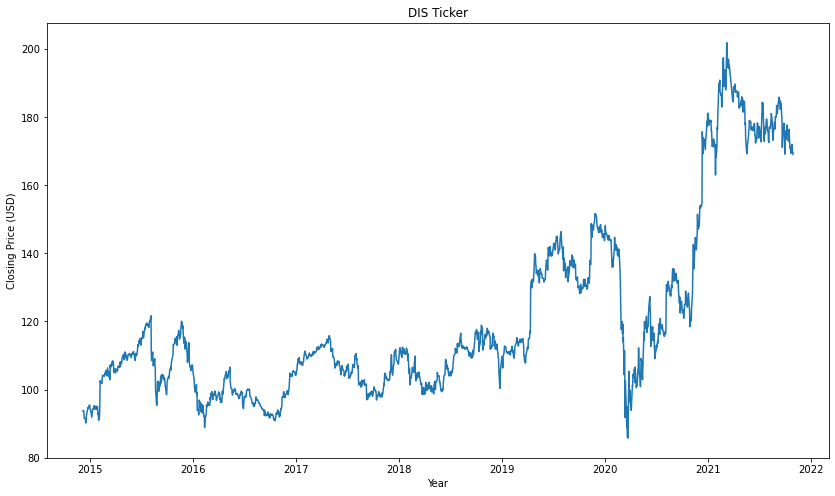

In [61]:
plt.figure(figsize=(14,8))

plt.plot(yfinance['parsed_dates'], yfinance['Close'])
plt.title("DIS Ticker")
plt.xlabel("Year")
plt.ylabel("Closing Price (USD)")

Text(0, 0.5, 'Score')

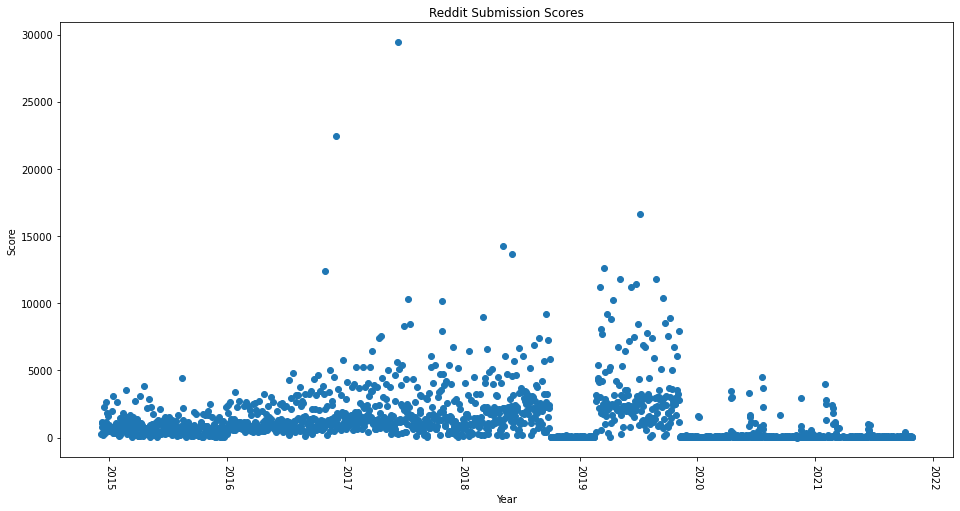

In [62]:
plt.figure(figsize=(16,8))

plt.scatter(weekday_df['parsed_dates'], weekday_df['score'])
plt.xticks(rotation=270)
plt.title("Reddit Submission Scores")
plt.xlabel("Year")
plt.ylabel("Score")

Text(0, 0.5, '# of Comments')

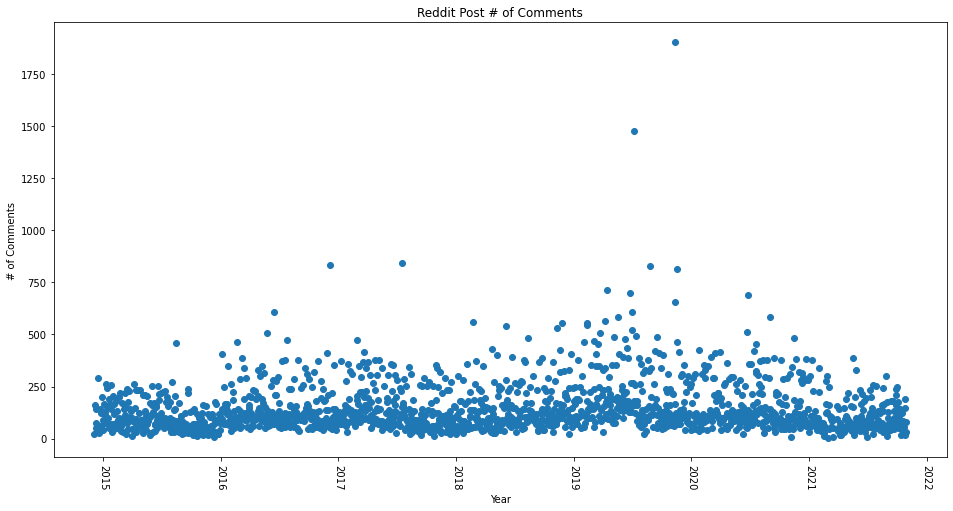

In [63]:
plt.figure(figsize=(16,8))

plt.scatter(weekday_df['parsed_dates'], weekday_df['num_comments'])
plt.xticks(rotation=270)
plt.title("Reddit Post # of Comments")
plt.xlabel("Year")
plt.ylabel("# of Comments")

In [64]:
X_score = weekday_df['score']
X_coms = weekday_df['num_comments']
y = yfinance['Close']

In [65]:
from scipy.stats import linregress


linreg_score = linregress(weekday_df['score'], yfinance['Close'])
print(f"Linear regression of stock prices as function of subreddit post scores: \n{linreg_score}\n")

linreg_coms = linregress(weekday_df['num_comments'], yfinance['Close'])
print(f"Linear regression of stock prices as function of number of comments on subreddit posts: \n{linreg_coms}")

Linear regression of stock prices as function of subreddit post scores: 
LinregressResult(slope=-0.0024053997881351213, intercept=123.53113392473499, rvalue=-0.18417815801007126, pvalue=1.2363603299051786e-14, stderr=0.00030916242121436393, intercept_stderr=0.7423889775500354)

Linear regression of stock prices as function of number of comments on subreddit posts: 
LinregressResult(slope=-0.0019895982509226928, intercept=120.59948691872488, rvalue=-0.009308956091147668, pvalue=0.6991484471570557, stderr=0.005147270119492359, intercept_stderr=0.9663102576289082)


In [66]:
print("Linear regression of stock prices as function of subreddit post scores")
print(f"The slope is: {linreg_score.slope}")
print(f"The Interecept is: {linreg_score.intercept}")
print(f"The p.value is: {linreg_score.pvalue}\n")

print("Linear regression of stock prices as function of number of comments on subreddit posts")
print(f"The slope is: {linreg_coms.slope}")
print(f"The Interecept is: {linreg_coms.intercept}")
print(f"The p.value is: {linreg_coms.pvalue}")

Linear regression of stock prices as function of subreddit post scores
The slope is: -0.0024053997881351213
The Interecept is: 123.53113392473499
The p.value is: 1.2363603299051786e-14

Linear regression of stock prices as function of number of comments on subreddit posts
The slope is: -0.0019895982509226928
The Interecept is: 120.59948691872488
The p.value is: 0.6991484471570557


Text(0, 0.5, 'Stock Prices ($)')

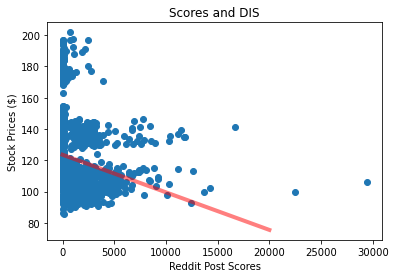

In [67]:
# plt.figure(figsize=(14,8))

x_axis = x_axis = range(0, 20000)
y_line = linreg_score.intercept + linreg_score.slope * x_axis

plt.scatter(X_score, y)

plt.plot(x_axis, y_line, color='red', linewidth=4, alpha=0.5)
plt.title("Scores and DIS")
plt.xlabel("Reddit Post Scores")
plt.ylabel("Stock Prices ($)")

Text(0, 0.5, 'Stock Prices ($)')

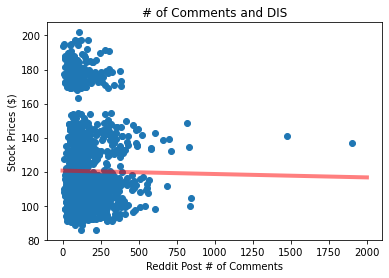

In [68]:
# plt.figure(figsize=(14,8))

x_axis = x_axis = range(0, 2000)
y_line = linreg_coms.intercept + linreg_coms.slope * x_axis

plt.scatter(X_coms, y)

plt.plot(x_axis, y_line, color='red', linewidth=4, alpha=0.5)
plt.title("# of Comments and DIS")
plt.xlabel("Reddit Post # of Comments")
plt.ylabel("Stock Prices ($)")